In [0]:
#!unzip air-pollution-in-seoul.zip

In [74]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [76]:
# Retriving data for station code 103 for NO2
data_103=data[(data['Station code']==103) & (data['NO2']>0)]
print(len(data_103))
print(data_103.head(10))

25640
       Measurement date  Station code  ...  PM10  PM2.5
51810  2017-01-01 00:00           103  ...  70.0   68.0
51811  2017-01-01 01:00           103  ...  73.0   66.0
51812  2017-01-01 02:00           103  ...  67.0   65.0
51813  2017-01-01 03:00           103  ...  68.0   65.0
51814  2017-01-01 04:00           103  ...  65.0   61.0
51815  2017-01-01 05:00           103  ...  62.0   59.0
51816  2017-01-01 06:00           103  ...  66.0   61.0
51817  2017-01-01 07:00           103  ...  65.0   58.0
51818  2017-01-01 08:00           103  ...  67.0   69.0
51819  2017-01-01 09:00           103  ...  70.0   74.0

[10 rows x 11 columns]


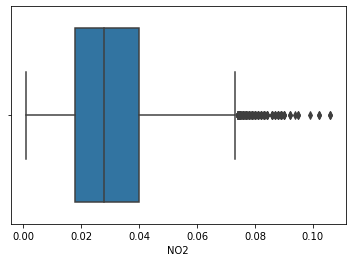

In [77]:
import seaborn as sns
sns.boxplot(data_103['NO2'])

25501


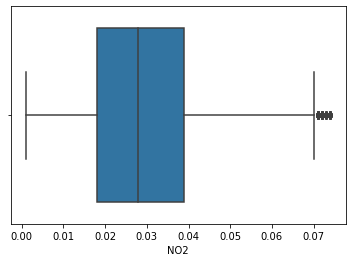

In [78]:
from scipy import stats
z = np.abs(stats.zscore(data_103['NO2']))
threshold = 3
#print(len(np.where(z > 3)))
data_103_Rout = data_103[(z < 3)]
print(len(data_103_Rout))
sns.boxplot(data_103_Rout['NO2'])

In [79]:
df=data_103_Rout['NO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(25501, 1)


In [80]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[0.001] [0.074]
25501
0.0 1.0


In [81]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


25496 [0.5205479452054794, 0.5068493150684931, 0.4931506849315069, 0.4794520547945205, 0.4520547945205479]


In [82]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(25496, 5)


,x1,x2,x3,x4,y
0,0.520548,0.506849,0.493151,0.479452,0.452055
1,0.506849,0.493151,0.479452,0.452055,0.410959
2,0.493151,0.479452,0.452055,0.410959,0.424658
3,0.479452,0.452055,0.410959,0.424658,0.424658
4,0.452055,0.410959,0.424658,0.424658,0.438356
5,0.410959,0.424658,0.424658,0.438356,0.452055
6,0.424658,0.424658,0.438356,0.452055,0.452055
7,0.424658,0.438356,0.452055,0.452055,0.493151
8,0.438356,0.452055,0.452055,0.493151,0.479452
9,0.452055,0.452055,0.493151,0.479452,0.520548


In [83]:
print(matrix[:,4])

[[0.45205479]
 [0.4109589 ]
 [0.42465753]
 ...
 [0.31506849]
 [0.34246575]
 [0.32876712]]


In [84]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8414, 1) [[0.31642582]
 [0.29254272]
 [0.13260462]
 [0.20823549]
 [0.60873465]]


In [85]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.8482876259468367
[0.03423216]
[[ 0.01358712  0.00963798 -0.17239898  1.06160205]]


In [86]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.006034056289508349
absolute mean error :  0.056432641262270614
0.8425928211886166


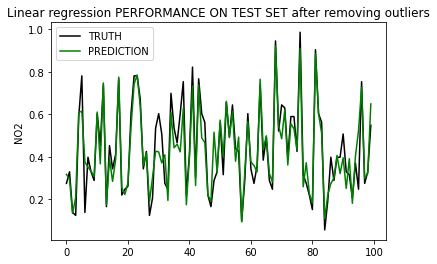

In [87]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('NO2')
plt.legend()
plt.show()

(25640, 1)
[0.001] [0.106]
25640
0.0 1.0
25635 [0.3619047619047619, 0.35238095238095235, 0.34285714285714286, 0.33333333333333337, 0.3142857142857143]
(8460, 1) [[0.31003802]
 [0.28356279]
 [0.30095165]
 [0.39876576]
 [0.33718903]]
mean squared eror :  0.0030570185932180653
absolute mean error :  0.0401578237165039
0.8439695101667072


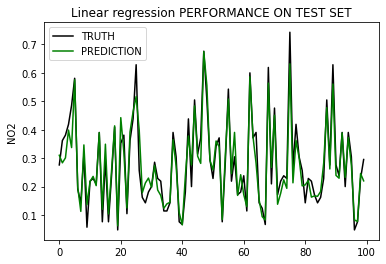

In [88]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_103['NO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [89]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.003057021850356899
absolute mean error :  0.040158344081595444
0.8439693439220632


In [90]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.003084511231867552
absolute mean error :  0.04034514538437626
0.84256628354427


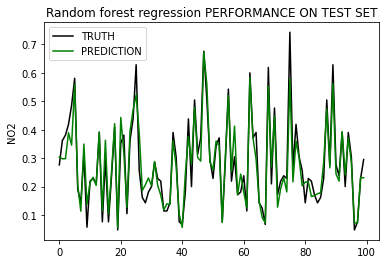

truth :  [[0.27619048]
 [0.36190476]
 [0.38095238]
 [0.41904762]
 [0.48571429]
 [0.58095238]
 [0.19047619]
 [0.14285714]
 [0.31428571]
 [0.05714286]]
prediction :  [0.30376246 0.29772278 0.29831196 0.38956809 0.34554576 0.55937628
 0.20517472 0.11346561 0.34963068 0.13708685]


In [91]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [92]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.003058862688391812
0.04022133433316065
0.8438753873916945


In [93]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.003099155887674552
absolute mean error :  0.03995118298632599
0.8418188190623478


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


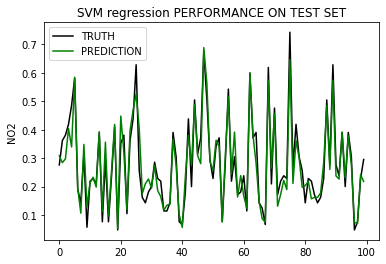

In [94]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [95]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
17175/17175 [==============================] - 1s 71us/step - loss: 0.0038 - accuracy: 1.1645e-04
Epoch 2/100
17175/17175 [==============================] - 1s 67us/step - loss: 0.0031 - accuracy: 1.1645e-04
Epoch 3/100
17175/17175 [==============================] - 1s 64us/step - loss: 0.0030 - accuracy: 1.1645e-04
Epoch 4/100
17175/17175 [==============================] - 1s 64us/step - loss: 0.0031 - accuracy: 1.1645e-04
Epoch 5/100
17175/17175 [==============================] - 1s 68us/step - loss: 0.0031 - accuracy: 1.1645e-04
Epoch 6/100
17175/17175 [==============================] - 1s 64us/step - loss: 0.0031 - accuracy: 1.1645e-04
Epoch 7/100
17175/17175 [==============================] - 1s 63us/step - loss: 0.0030 - accuracy: 1.1645e-04
Epoch 8/100
17175/17175 [==============================] - 1s 63us/step - loss: 0.0030 - accuracy: 1.1645e-04
Epoch 9/100
17175/17175 [==============================] - 1s 65us/step - loss: 0.0030 - accuracy: 1.1645e-04
Epoch 10/1

dict_keys(['loss', 'accuracy'])


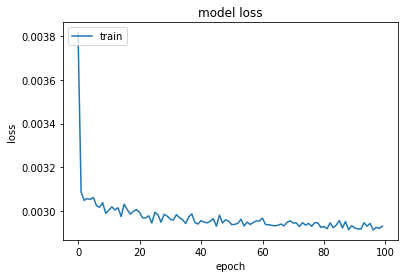

mean squared error :  0.003107164053974433
mean absolute error :  0.03995118298632599
0.8418188190623478


In [96]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


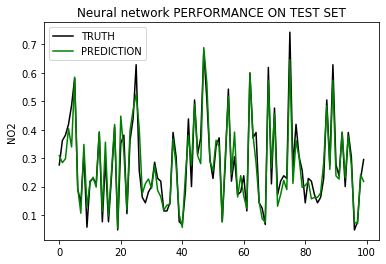

In [97]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [98]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.2        0.17142857 0.15238095 0.13333333]
 [0.2        0.2        0.22857143 0.2952381 ]
 [0.13333333 0.12380952 0.1047619  0.12380952]
 ...
 [0.3047619  0.35238095 0.2952381  0.28571429]
 [0.36190476 0.4        0.40952381 0.32380952]
 [0.45714286 0.23809524 0.22857143 0.21904762]]
(17175, 4)
(17175, 4, 1)


In [99]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
17175/17175 [==============================] - 7s 427us/step - loss: 0.0095
Epoch 2/100
17175/17175 [==============================] - 6s 356us/step - loss: 0.0034
Epoch 3/100
17175/17175 [==============================] - 6s 363us/step - loss: 0.0031
Epoch 4/100
17175/17175 [==============================] - 6s 347us/step - loss: 0.0030
Epoch 5/100
17175/17175 [==============================] - 6s 349us/step - loss: 0.0030
Epoch 6/100
17175/17175 [==============================] - 6s 356us/step - loss: 0.0030
Epoch 7/100
17175/17175 [==============================] - 6s 355us/step - loss: 0.0030
Epoch 8/100
17175/17175 [==============================] - 6s 356us/step - loss: 0.0031
Epoch 9/100
17175/17175 [==============================] - 6s 355us/step - loss: 0.0030
Epoch 10/100
17175/17175 [==============================] - 6s 351us/step - loss: 0.0030
Epoch 11/100
17175/17175 [==============================] - 6s 355us/step - loss: 0.0030
Epoch 12/100
17175/17175 [====

dict_keys(['loss'])


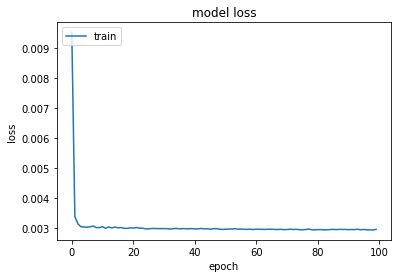

mean square error : 0.003056916001192526
mean absolute error :  0.04004976906768913
0.8439747464724442


In [100]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

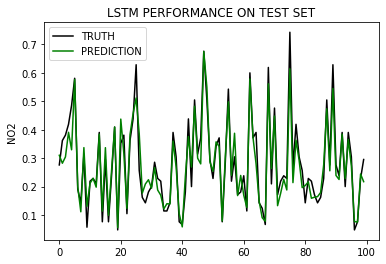

In [101]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [0]:
#joblib.dump(regressor,'lstm_regressor.pkl')
#from google.colab import files
#files.download('lstm_regressor.pkl')